In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/
!unzip /content/drive/'My Drive'/data.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/Train/5/00005_00017_00016.png  
  inflating: data/Train/5/00005_00017_00019.png  
  inflating: data/Train/5/00005_00017_00025.png  
  inflating: data/Train/5/00005_00017_00027.png  
  inflating: data/Train/5/00005_00017_00028.png  
  inflating: data/Train/5/00005_00017_00029.png  
  inflating: data/Train/5/00005_00018_00000.png  
  inflating: data/Train/5/00005_00018_00001.png  
  inflating: data/Train/5/00005_00018_00004.png  
  inflating: data/Train/5/00005_00018_00009.png  
  inflating: data/Train/5/00005_00018_00010.png  
  inflating: data/Train/5/00005_00018_00011.png  
  inflating: data/Train/5/00005_00018_00012.png  
  inflating: data/Train/5/00005_00018_00013.png  
  inflating: data/Train/5/00005_00018_00015.png  
  inflating: data/Train/5/00005_00018_00016.png  
  inflating: data/Train/5/00005_00018_00017.png  
  inflating: data/Train/5/00005_00018_00019.png  
  inflating: data/Train/5/00005_00018_00020.png  

In [3]:
import os
import numpy as np
from matplotlib import pyplot as plt 
import tensorflow as tf
from sklearn.model_selection import train_test_split
from PIL import Image, ImageOps
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from keras.utils import to_categorical
from keras.models import Sequential

In [6]:
import pandas as pd

In [8]:
%cd /content/data/
dataTrain = []
labelTrain = []
classes = 43
dFTrain = pd.read_csv('Train.csv')
#dFTest = pd.read_csv('Test.csv')
#dFValid = pd.read_csv('Validation.csv')
pathTrain = np.array(dFTrain['Path'])
pathLabel = np.array(dFTrain['ClassId'])

/content/data


In [9]:
print(pathTrain.shape)
print(pathLabel.shape)

(31368,)
(31368,)


In [10]:
index = 0
for i in pathTrain:
  images = Image.open(i).convert('RGB')
  images = images.resize((32, 32))
  images = np.array(images)
  dataTrain.append(images)
  labelTrain.append(pathLabel[index])
  index += 1
print(len(dataTrain))
print(len(labelTrain))


31368
31368


In [25]:
dataTest = []
labelTest = []
dFTest = pd.read_csv('Test.csv')
pathTest = np.array(dFTest['Path'])
pathLabelTest = np.array(dFTest['ClassId'])

index = 0
for i in pathTest:
  images = Image.open(i).convert('RGB')
  images = images.resize((32, 32))
  images = np.array(images)
  dataTest.append(images)
  labelTest.append(pathLabelTest[index])
  index += 1
print(len(dataTest))
print(len(labelTest))

12630
12630


In [12]:
dataValid = []
labelValid = []
dFValid = pd.read_csv('Validation.csv')
pathValid = np.array(dFValid['Path'])
pathLabelValid = np.array(dFValid['ClassId'])

In [13]:
index = 0

for i in pathValid:
  path = 'Validation/' + i;
  images = Image.open(path).convert('RGB')
  images = images.resize((32, 32))
  images = np.array(images)
  dataValid.append(images)
  labelValid.append(pathLabelValid[index])
  index += 1
print(len(dataValid))
print(len(dataValid))

7841
7841


In [14]:
dataTrain = np.array(dataTrain)
dataTest = np.array(dataTest)
dataValid = np.array(dataValid)
labelTrain = np.array(labelTrain)
labelTest = np.array(labelTest)
labelValid = np.array(labelValid)

print(dataTrain.shape, dataTest.shape, dataValid.shape)
print(labelTrain.shape, labelTest.shape, labelValid.shape)

(31368, 32, 32, 3) (12630, 32, 32, 3) (7841, 32, 32, 3)
(31368,) (12630,) (7841,)


In [15]:
labelTrain = to_categorical(labelTrain, 43)
#labelTest = to_categorical(labelTest, 43)
labelValid = to_categorical(labelValid, 43)


In [16]:
print(dataValid.shape[1:])


(32, 32, 3)


In [17]:
model = Sequential()

#Convolutional block
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation= 'relu', input_shape = dataTrain.shape[1:]))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(43, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

In [19]:
epochs = 40

In [20]:

train_his = model.fit(dataTrain, labelTrain, validation_data=(dataValid, labelValid), batch_size=32, epochs=epochs)

Epoch 1/40
981/981 [==============================] - 11s 4ms/step - loss: 5.3987 - accuracy: 0.3927 - val_loss: 0.3362 - val_accuracy: 0.9227
Epoch 2/40
981/981 [==============================] - 3s 4ms/step - loss: 0.6127 - accuracy: 0.8233 - val_loss: 0.1863 - val_accuracy: 0.9638
Epoch 3/40
981/981 [==============================] - 3s 3ms/step - loss: 0.3964 - accuracy: 0.8800 - val_loss: 0.1316 - val_accuracy: 0.9688
Epoch 4/40
981/981 [==============================] - 4s 4ms/step - loss: 0.3401 - accuracy: 0.9020 - val_loss: 0.1371 - val_accuracy: 0.9639
Epoch 5/40
981/981 [==============================] - 3s 4ms/step - loss: 0.3331 - accuracy: 0.9048 - val_loss: 0.1184 - val_accuracy: 0.9695
Epoch 6/40
981/981 [==============================] - 4s 4ms/step - loss: 0.3020 - accuracy: 0.9147 - val_loss: 0.0931 - val_accuracy: 0.9758
Epoch 7/40
981/981 [==============================] - 4s 4ms/step - loss: 0.3266 - accuracy: 0.9119 - val_loss: 0.1316 - val_accuracy: 0.9638
Epoch

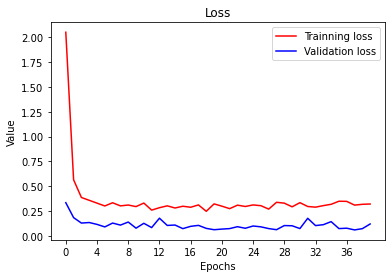

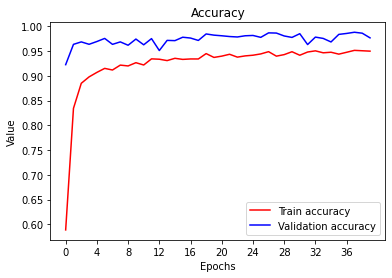

In [21]:
title = ['Loss', 'Accuracy']
parameters = {0:['loss', 'val_loss'], 1:['accuracy', 'val_accuracy']}
labels = {0:['Trainning loss', 'Validation loss'], 1:['Train accuracy', 'Validation accuracy']}
for i in range(2):
  plt.plot(np.arange(epochs), train_his.history[parameters.get(i)[0]], color='red', label=labels.get(i)[0])
  plt.plot(np.arange(epochs), train_his.history[parameters.get(i)[1]], color='blue', label=labels.get(i)[1])
  plt.title(title[i])
  plt.xticks(np.arange(0, epochs, 4))
  plt.xlabel('Epochs')
  plt.ylabel('Value')
  plt.legend()
  plt.savefig("{}.png".format(title[i]))
  plt.show()
plt.show()

In [22]:
labels_predict_for_test=np.argmax(model.predict(dataTest),axis=1)
print(labels_predict_for_test.shape)


(12630,)


In [26]:
labelTest = np.array(labelTest)
print(labelTest.shape)

(12630,)


In [27]:
from sklearn.metrics import accuracy_score
print("Accuracy for Test: ", accuracy_score(labels_predict_for_test, labelTest))

Accuracy for Test:  0.9234362628661916
